In [161]:
import h5py
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
import numpy as np
import cv2
%matplotlib inline
import scipy

from itertools import cycle

import numpy as np
from scipy import ndimage
from scipy.ndimage import binary_dilation, binary_erosion
from msnake import MSnake

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [162]:
PATH_MASK_H5 ="/mnt/dfs/xjyan/269-deeplevelset-segmentation/experiments/269_unet2/test/unet2_3_11_predictions.h5"
PATH_INPUT_H5 = "/mnt/dfs/xjyan/patches/269_test_patch_2class.h5"

msk_h5 = h5py.File(PATH_MASK_H5, "r")
input_h5 = h5py.File(PATH_INPUT_H5, "r")

ex_mask, ex_img, ex_nn_mask = None, None, None

for k, g in list(msk_h5.items())[300:]:
    ex_nn_mask = g["binary_mask"][0,:,:,0] 
    ex_img = input_h5[k]["ct_slice"][:,:]

    break

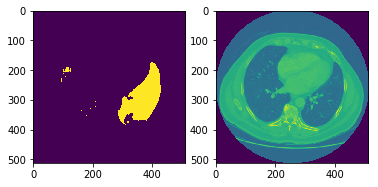

In [163]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(ex_nn_mask)
plt.subplot(1,2,2)
plt.imshow(ex_img)

/home/xjyan/.conda/envs/py3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


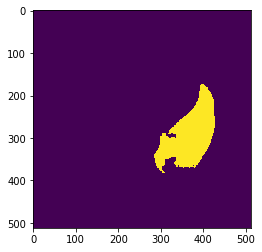

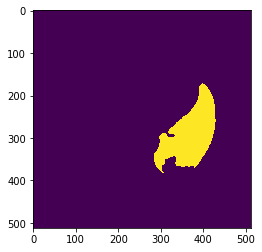

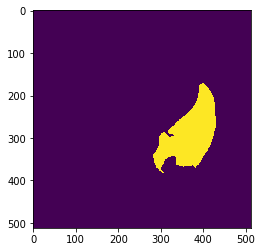

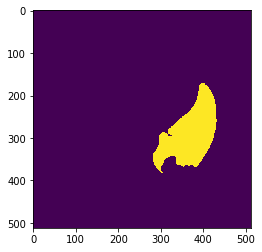

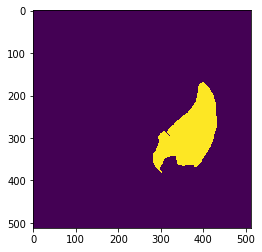

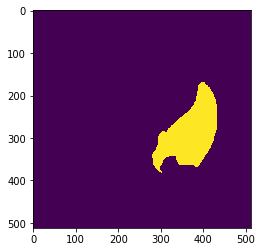

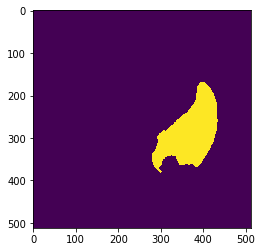

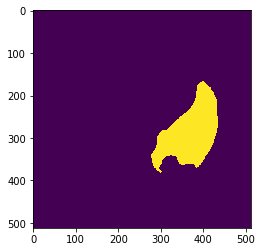

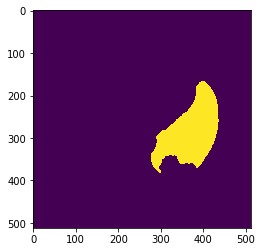

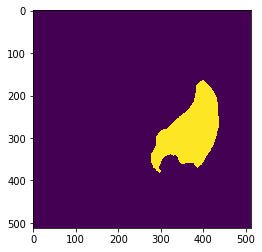

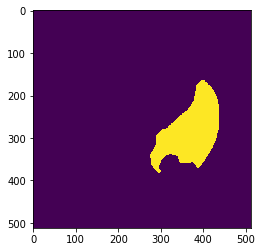

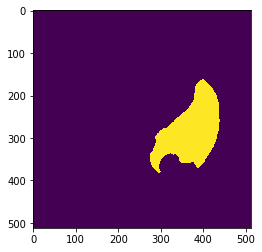

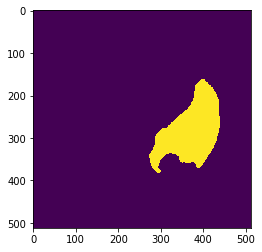

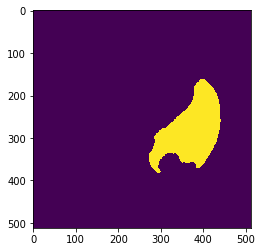

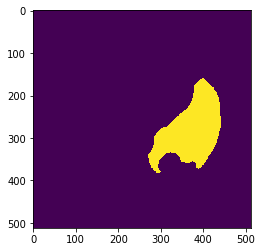

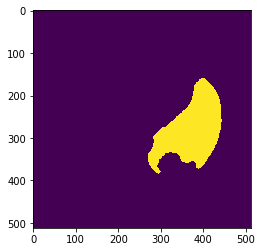

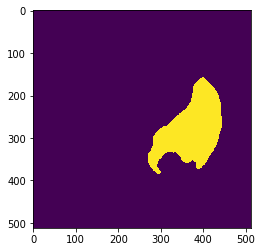

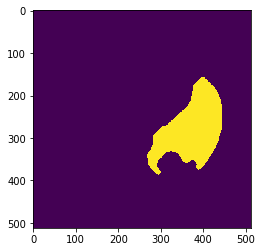

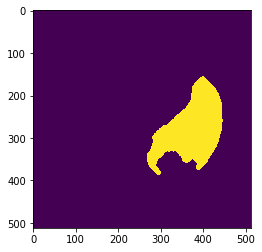

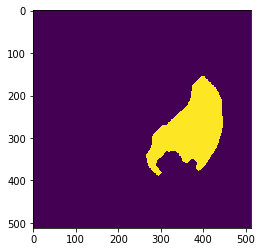

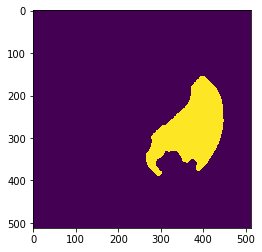

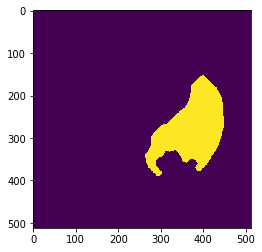

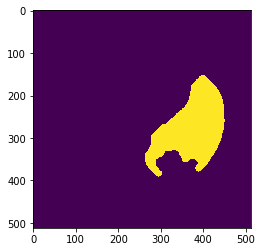

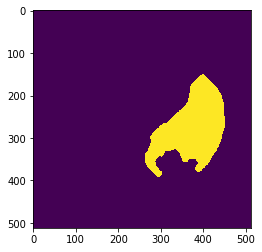

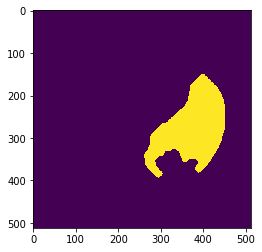

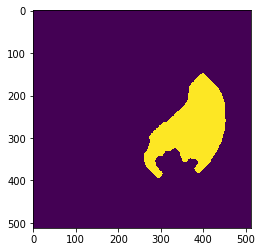

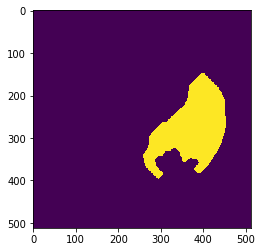

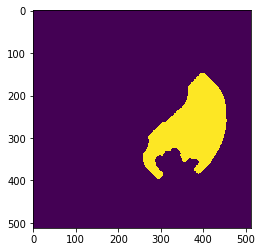

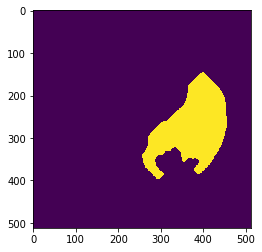

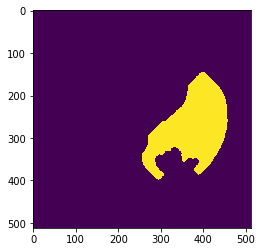

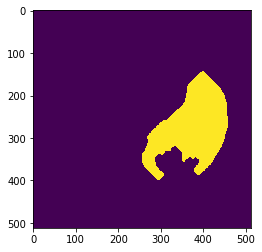

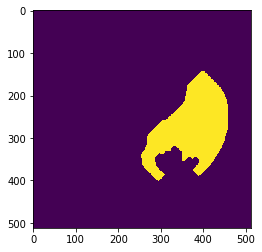

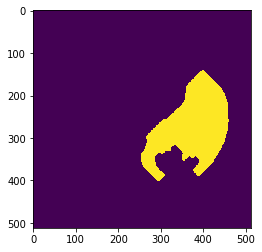

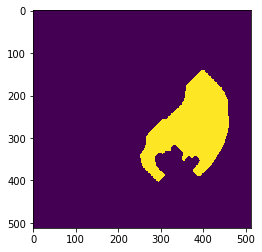

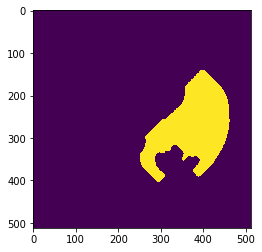

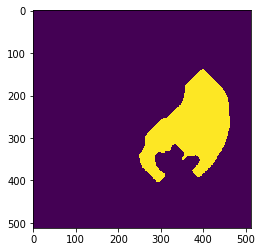

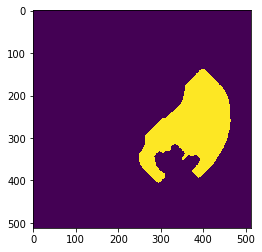

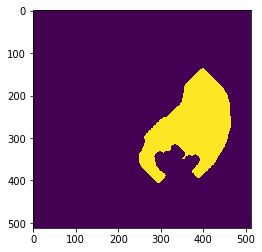

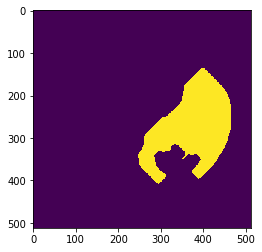

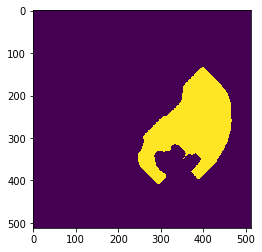

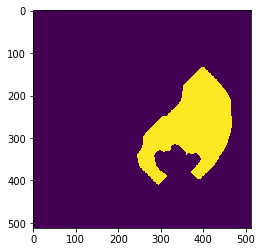

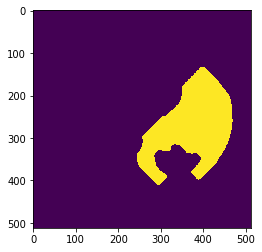

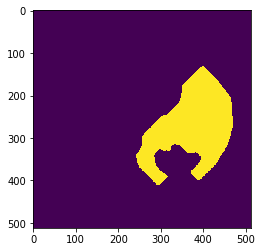

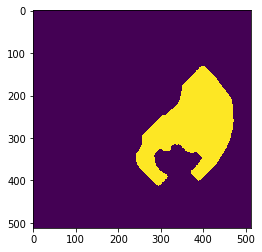

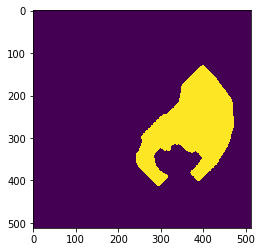

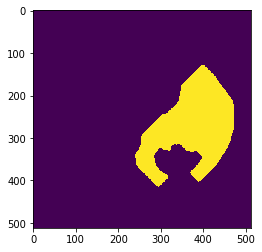

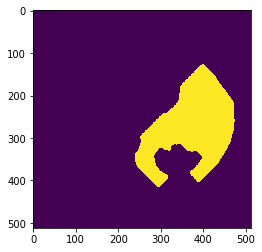

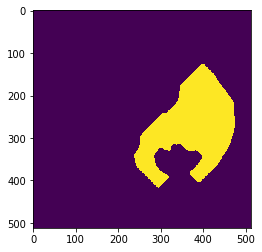

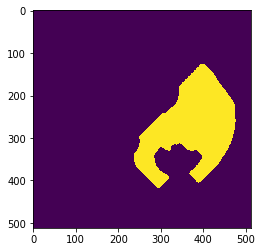

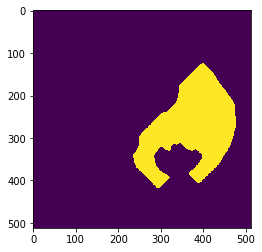

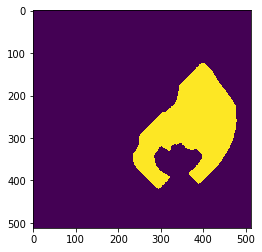

In [165]:
msnake = MSnake(ex_nn_mask, ex_img, iterations=50)
plt.figure()
plt.imshow(msnake.init_mask)

l_debug = msnake.evolve()

for i in l_debug:
    plt.figure()
    plt.imshow(i)